In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%config InlineBackend.figure_format = "retina"

import numpy as np
import xarray as xr
import sys,os,glob
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

sys.path.insert(0,'../../../')

from matplotlib import rcParams
plt.style.use(['fivethirtyeight','../../../twind/wind-paper.mplstyle'])
rcParams["savefig.dpi"] = 200
rcParams["figure.dpi"] = 200

import warnings

warnings.simplefilter("ignore")

# Figures in Paper II 

This tutorial shows how `Twind` package can be used to produce figures in Paper II. See the source code [twind/plotter.py](https://github.com/changgoo/Twind/tree/master/twind/plotter.py) to know what is happening under the scean.

In [3]:
import twind
from twind.plotter import *

## Figure 1: display simulation PDFs

In [4]:
# read in simulated PDF
sim = twind.TigressSimLoader('R4','H')
sim.load(download=True)
sim.set_axes(sim.simpdf)

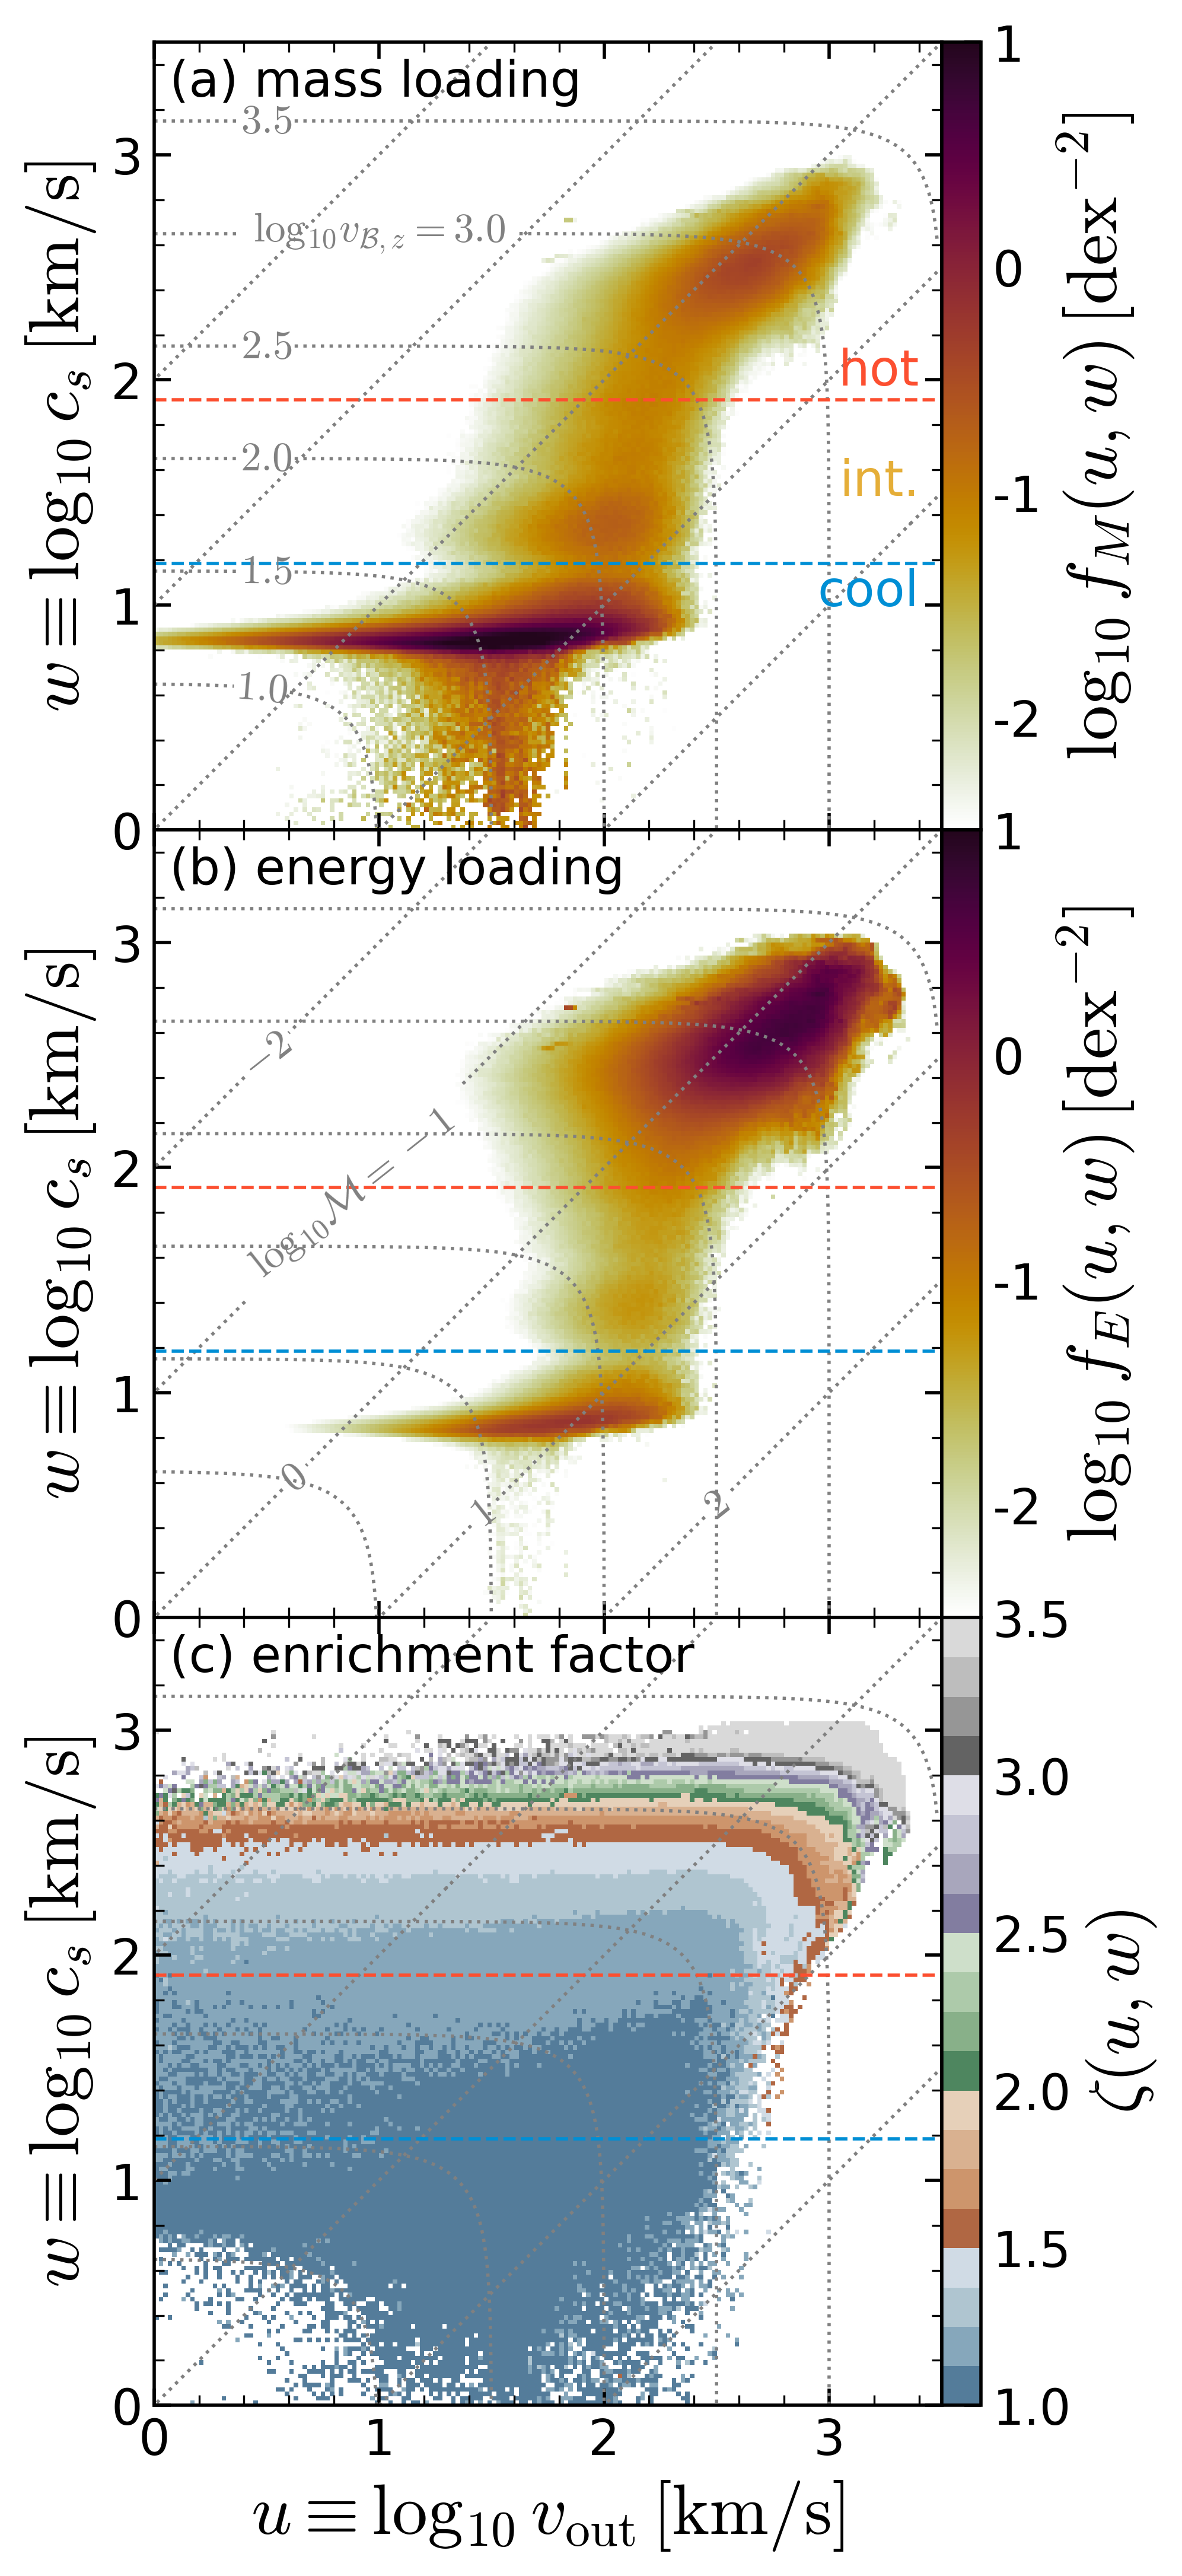

In [5]:
with plt.style.context([{'axes.grid':False}]):
    fig=plot_flux_pdfs_yZ(sim.simpdf,grid=True)

This figure shows the joint PDFs of $u\equiv \log_{10} v_{\rm out}$ and $w\equiv \log_{10} c_s$ for Model R4 at |z| = H. (a) Mass loading PDF, (b) energy loading PDF, and (c) enrichment factor. The red and blue dashed lines denote temperature cuts to separate cool ($T < 2 \times 10^4$ K), intermediate ($2\times10^4$ K $< T < 5 \times 10^5$ K), and hot ($5 \times 10^5$ K $< T$) phases. The dotted gray lines denote loci of constant Bernoulli velocity (labeled in (a))
$$v_{B,z}\equiv (v_{\rm out}^2 + 5c_s^2)^{1/2}$$ 
and Mach number (labeled in (b))
$$\mathcal{M} \equiv v_{\rm out}/c_s$$
**Notice that both mass and energy loading PDFs are distributed widely in large range of u and w, and there is clear correlation between the enrichment factor** $\zeta(u,w)$ **and Bernoulli velocity** $v_{B,z}$.

##  Figure 2: reconstruct PDFs from mass loading PDF

As the joint PDF we are after is a function of the outflow velocity $v_{\rm out}$ and sound speed $c_s$, the momentum, energy, and metal loading PDFs can be reconstructed from the mass loading PDF. We present a reconstruction procedure in Section 3 of the paper. How good is this reconstruction procedure? See below.

In [6]:
sims=twind.TigressSimContainer(z0='H')

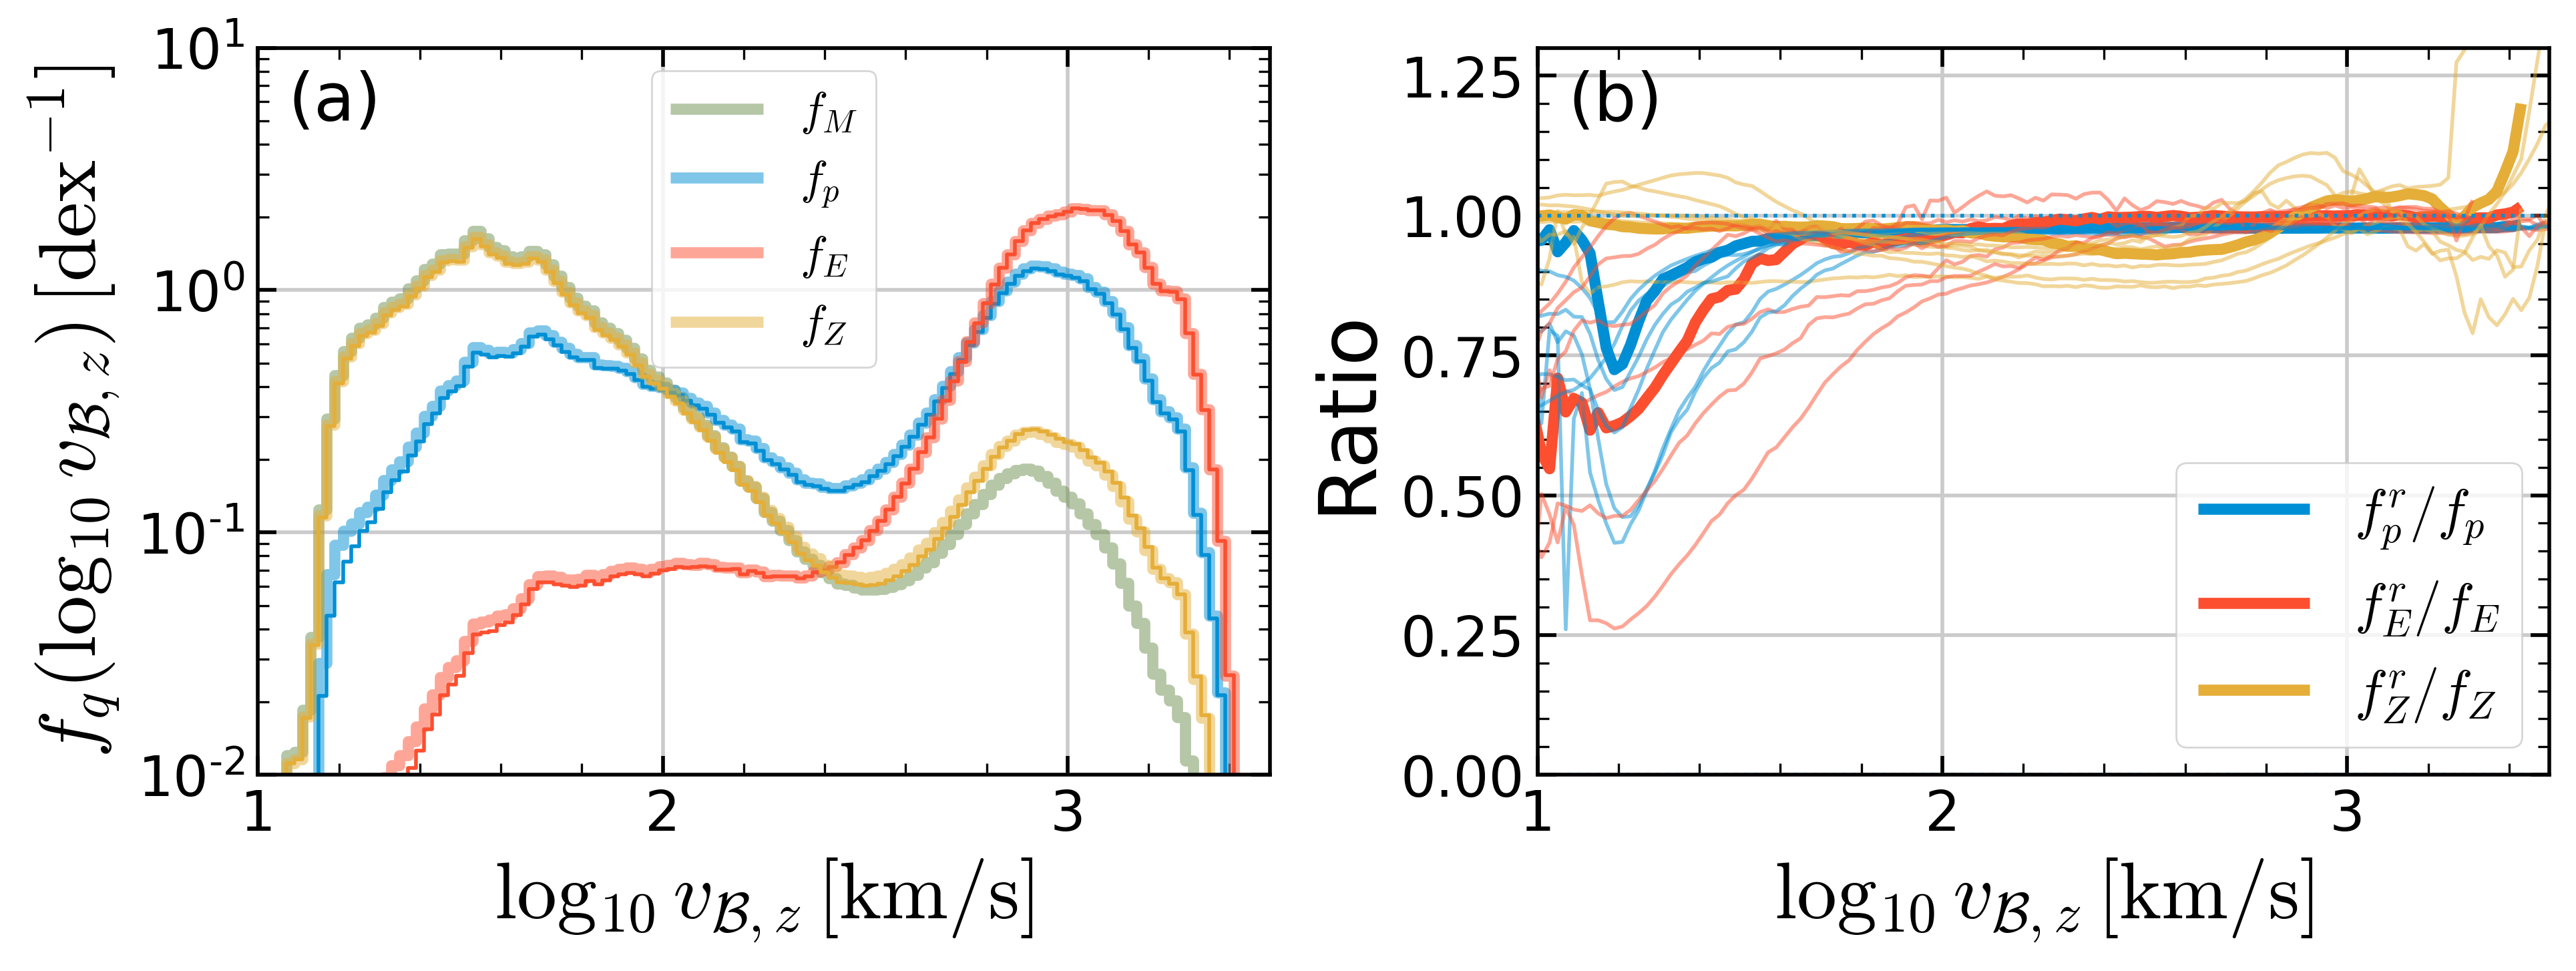

In [7]:
fig=flux_reconstruction(sims.sims)

**(a)** Examples of PDFs for 
    loading factors projected onto $\log v_{B,z}$ for model R4 at $|z|=H$. Thick lines show direct measurements of all PDFs, while thin lines with the same color (overlying the thick lines almost everywhere) show reconstructions from the mass PDF of momentum, energy, and metal PDFs.
    
**(b)** The ratios of reconstructed PDFs to the original PDFs for all models at $|z|=H$. The mean ratio at a given $\log v_{B,z}$ is obtained by a massflux weighted average. (Thick lines correspond to model R4, shown to left.

## Figure 3: comparison between model and simulation PDFs 

:ref:`model` gives a mass loading PDF model for cool and hot outflows separately. The model PDF is entirely determined with two parameters: $\Sigma_{\rm SFR}$ and $Z_{\rm ISM}$. How good are the simple `Twind` model PDFs in comparison with the complex simulation PDFs? Here, we show multi-axes projection to give a quantitative view.

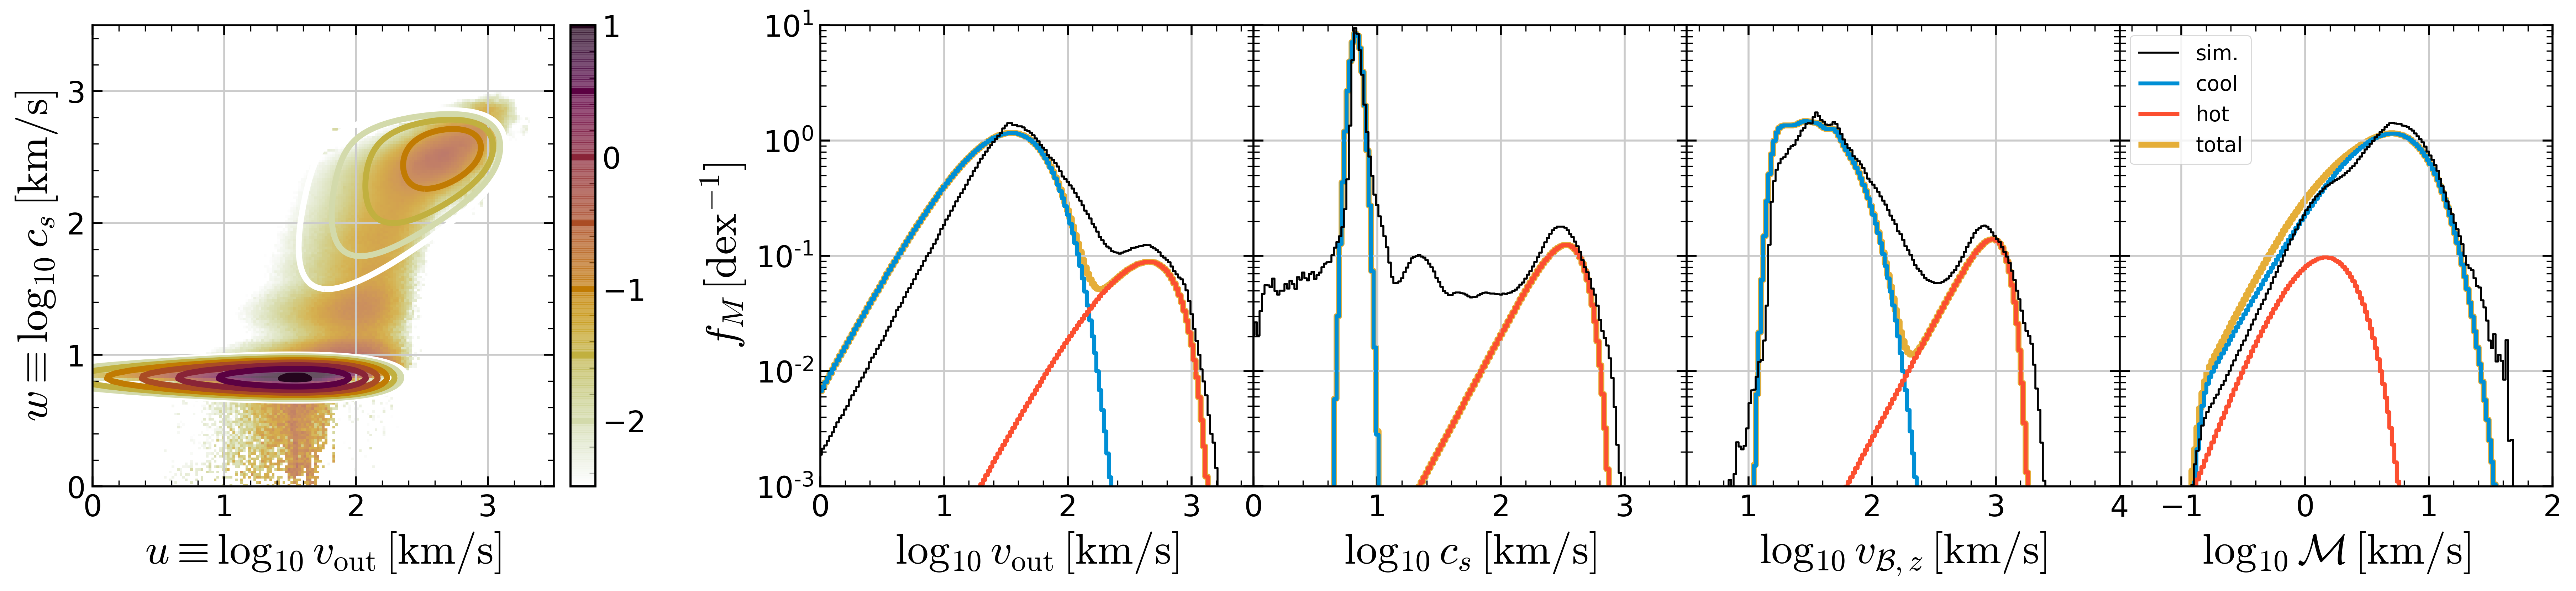

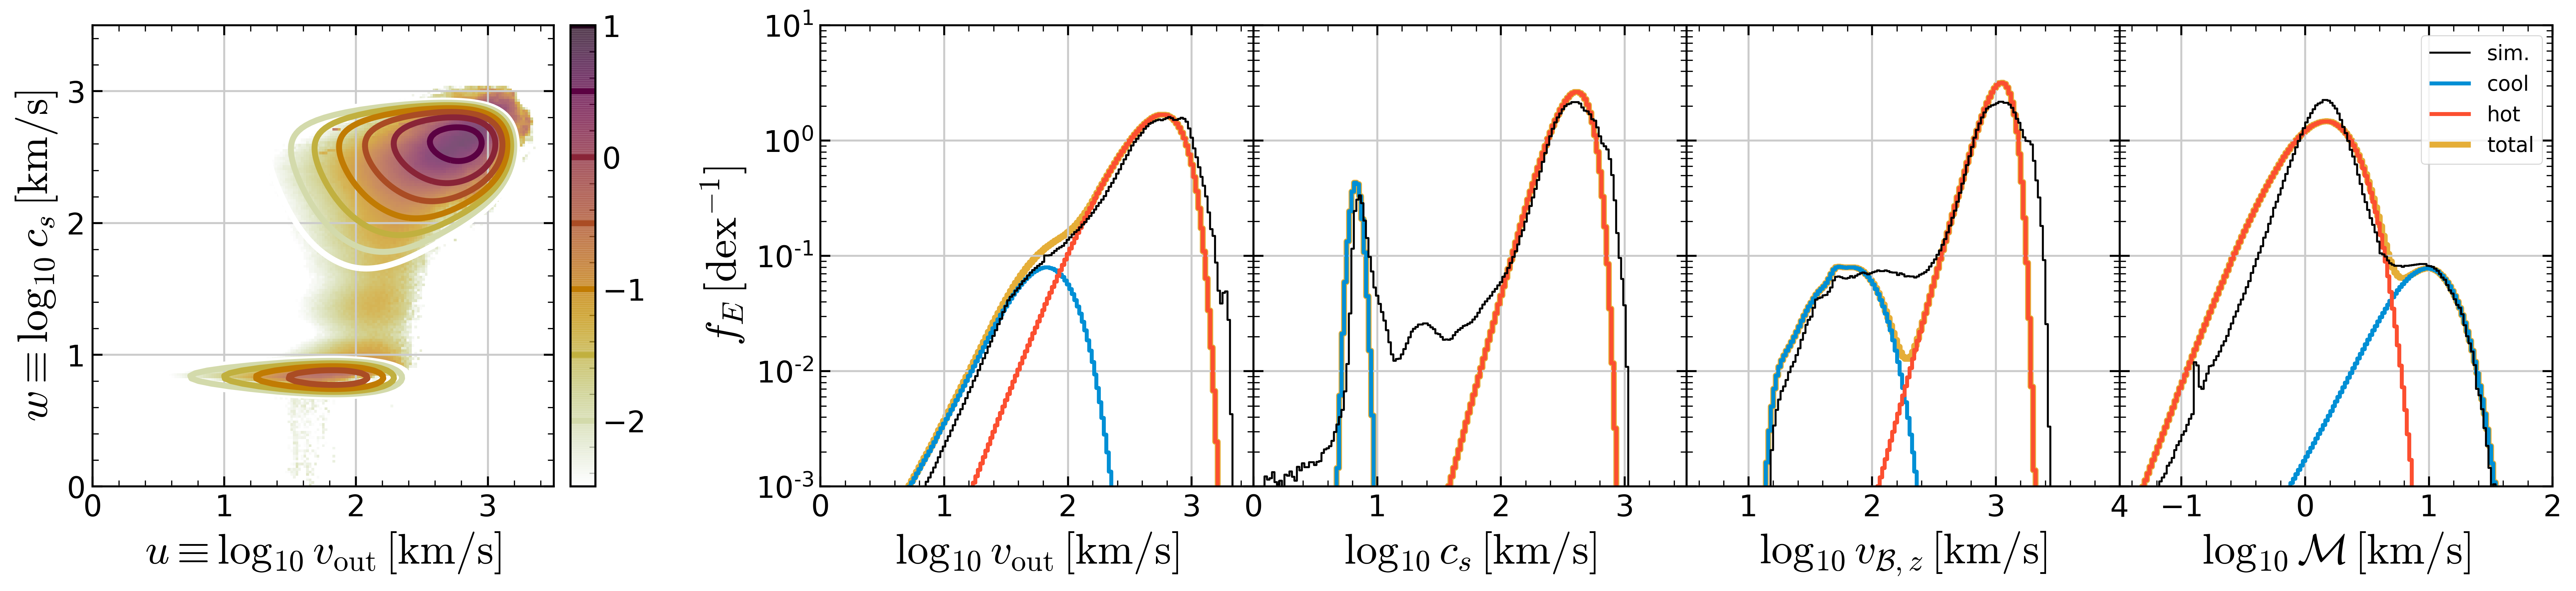

In [8]:
figM=comparison_pdfs(sims.sims['R4'],q='M')
figE=comparison_pdfs(sims.sims['R4'],q='E')

Comparison between simulated and model PDFs for R4: **(a)** mass loading and **(b)** energy loading. In each row, the first column shows full joint PDFs in logarithmic color scale ($\log\, f_{M,E}\,[\rm dex^{-2}]$) from the simulation (color) and model (contour). The remaining four panels are histograms showing projections onto 
(from left to right) **outflow velocity** $v_{\rm out}$, **sound speed** $c_s$, **Bernoulli velocity** $v_{B,z}$, **and Mach number $\mathcal{M}$** axes. Model PDFs are separated into cool (blue) and hot (orange) components. The sum of the two (yellow) matches simulated PDFs (black lines) well (especially for dominating components).

## Figure 4: Loading factor scalings 

What is the model prediction for outflow properties as a function of $\Sigma_{\rm SFR}$? How much mass, momentum, energy, and metals can travel far from the launching position in a given galactic halo? Beyond the velocity-integrated loading factor scalings presented in [Paper I](https://ui.adsabs.harvard.edu/abs/2020ApJ...900...61K/abstract), it is important to ask how much of outflows have specific energy $v_{B}^2/2$ large enough to climb up the potential well:
$$\newcommand\vout{v_{\rm out}}
\newcommand\vesc{v_{\rm esc}}
\newcommand\vBz{v_{\mathcal{B},z}}
    \eta_q(\vBz>\vesc)\equiv \tilde{\eta}_q
    \int_{\vBz=\vesc}^\infty \tilde{f}_{q}(u,w)dudw,
$$
Depending on specific questions, one can use $v_{\rm esc} \equiv \sqrt{2\Delta\Phi}$ for gravitational potential difference between any distance, e.g., $\Delta \Phi= \Phi(R_{\rm vir}) - \Phi(H)$.

In [9]:
tw=twind.TigressWindModel(z0=sims.z0,verbose=False)
tw.set_axes(verbose=False)
modelpdf=tw.build_model(renormalize=True,energy_bias=True,verbose=False)

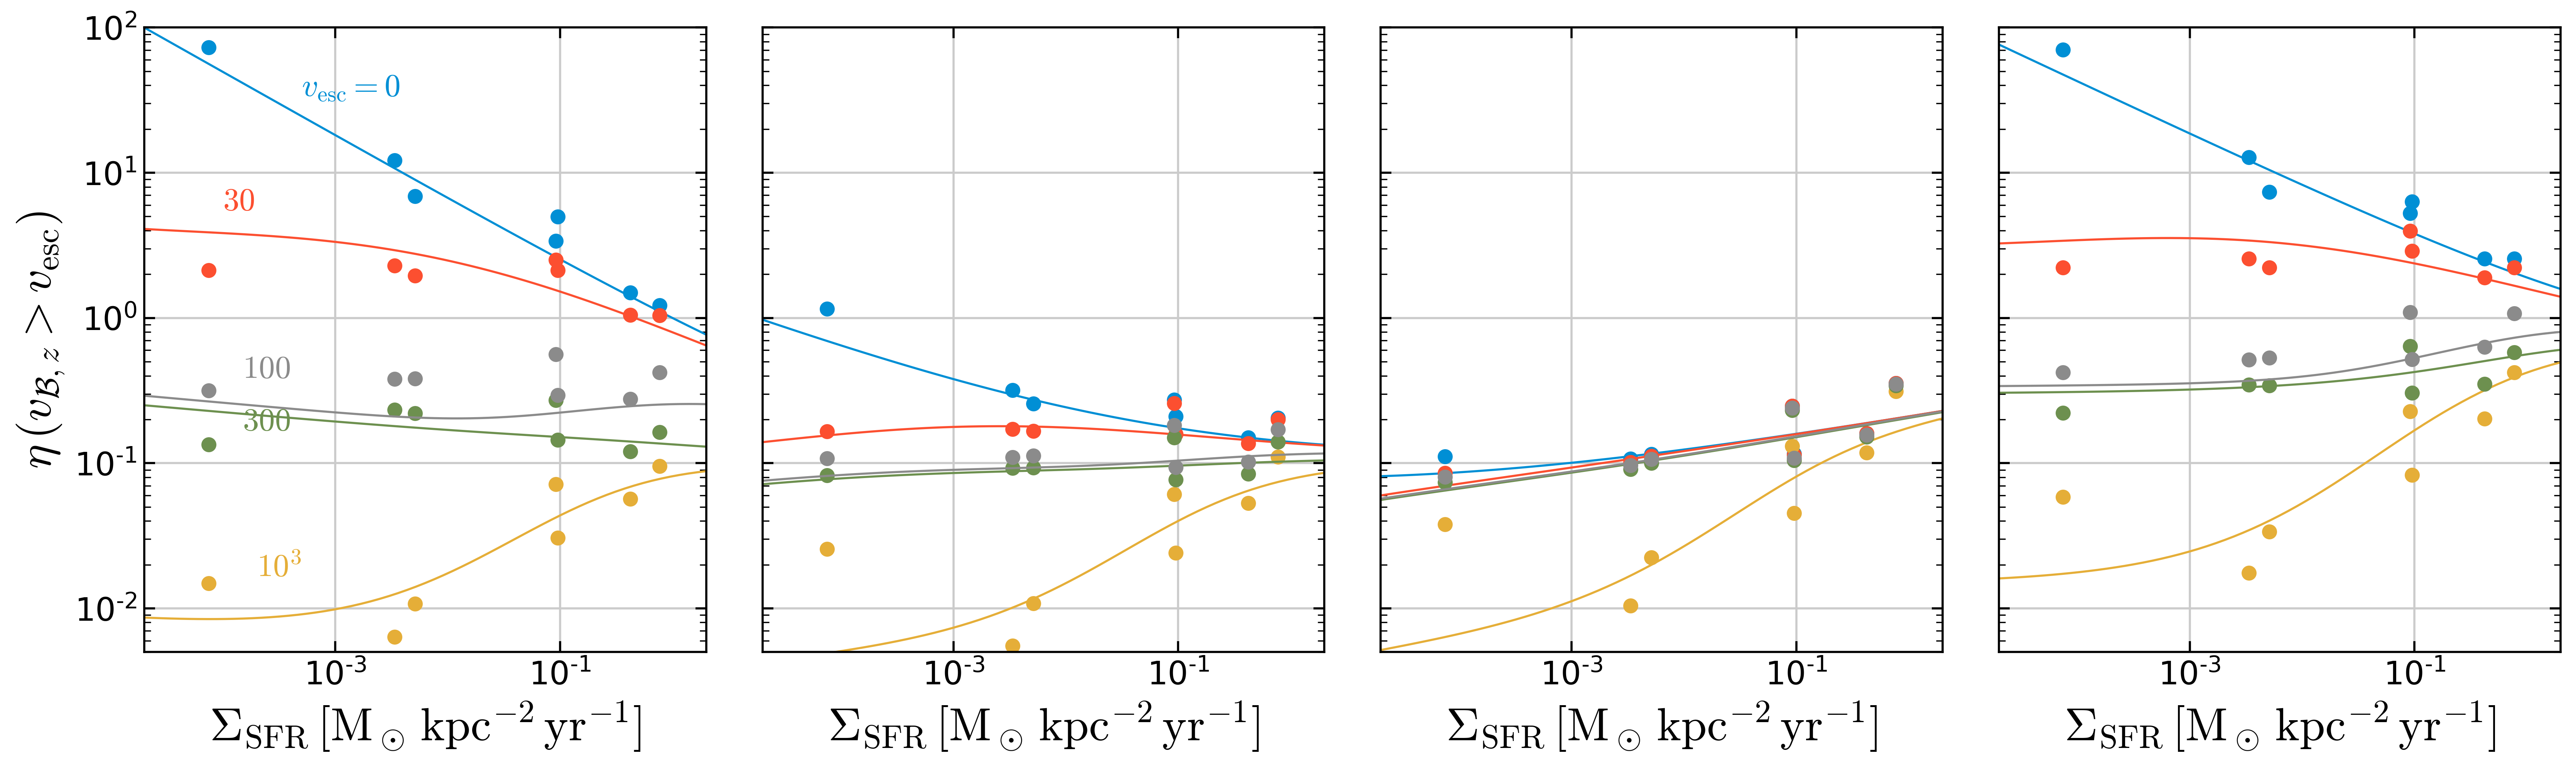

In [10]:
fig = show_loading(modelpdf,sims=sims.sims)

Loading factors for outflows with $v_{B,z}>v_{\rm esc}$. Filled circles are directly calculated from the simulation PDFs, while solid lines are from the model PDFs. Solid and dashed lines in (d) denote the model loading factors for $Z_{\rm ISM}=0.02$ and 0, respectively.

**Overall, the model tracks the general behavior of the simulation results.**

Beyond the result at $|z|=H$ presented in Paper II, `Twind` includes model and simulation PDFs at $|z|=2H$, 500 pc, and 1 kpc. Given its simplicity, the agreement with the simulation PDFs is stunning!

### Figure 4 at z=2H

[0.001, 100.0, 0.001, 100.0, 0.001, 100.0, 0.001, 100.0]

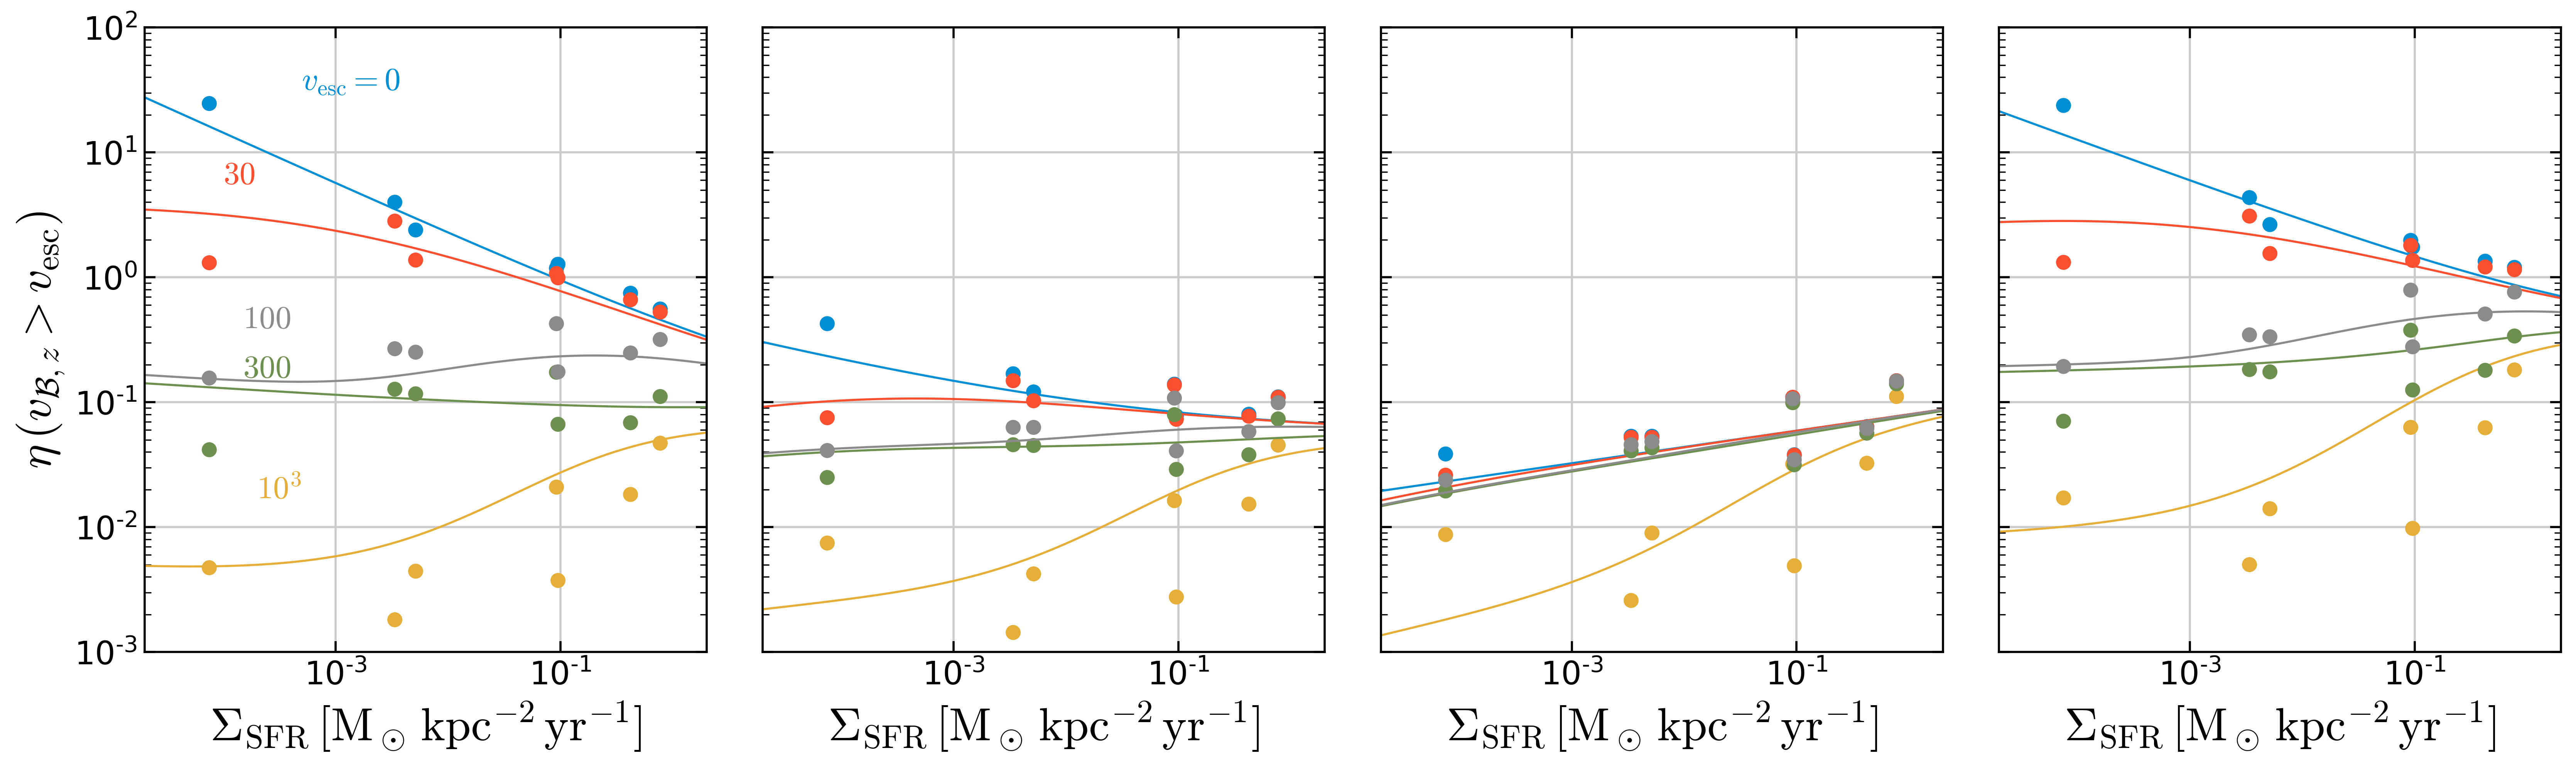

In [11]:
sims=twind.TigressSimContainer(z0='2H')
tw=twind.TigressWindModel(z0=sims.z0,verbose=False)
tw.set_axes(verbose=False)
modelpdf=tw.build_model(renormalize=True,energy_bias=True,verbose=False)
fig = show_loading(modelpdf,sims=sims.sims)
plt.setp(fig.axes,'ylim',(1.e-3,1.e2))

### Figure 4 at z=500pc

[0.001, 100.0, 0.001, 100.0, 0.001, 100.0, 0.001, 100.0]

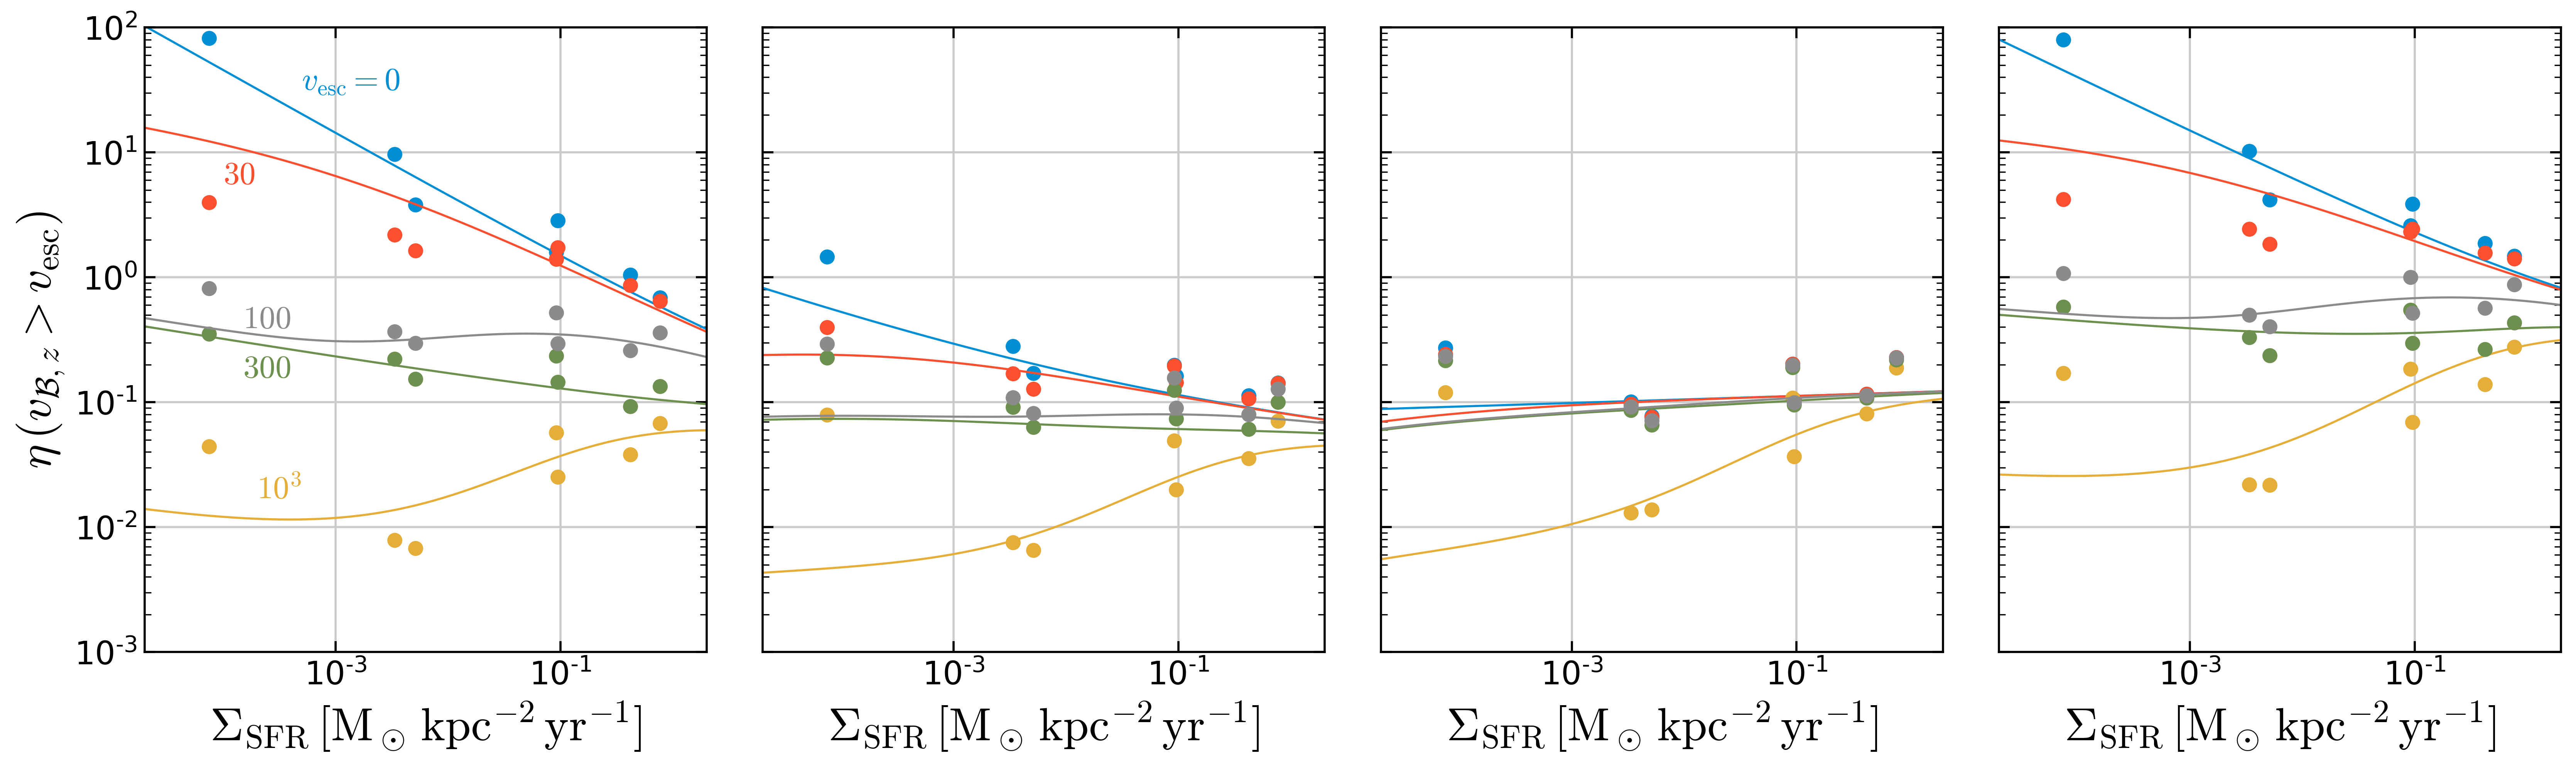

In [12]:
sims=twind.TigressSimContainer(z0='500')
tw=twind.TigressWindModel(z0=sims.z0,verbose=False)
tw.set_axes(verbose=False)
modelpdf=tw.build_model(renormalize=True,energy_bias=True,verbose=False)
fig = show_loading(modelpdf,sims=sims.sims)
plt.setp(fig.axes,'ylim',(1.e-3,1.e2))

### Figure 4 at z=1kpc

[0.001, 100.0, 0.001, 100.0, 0.001, 100.0, 0.001, 100.0]

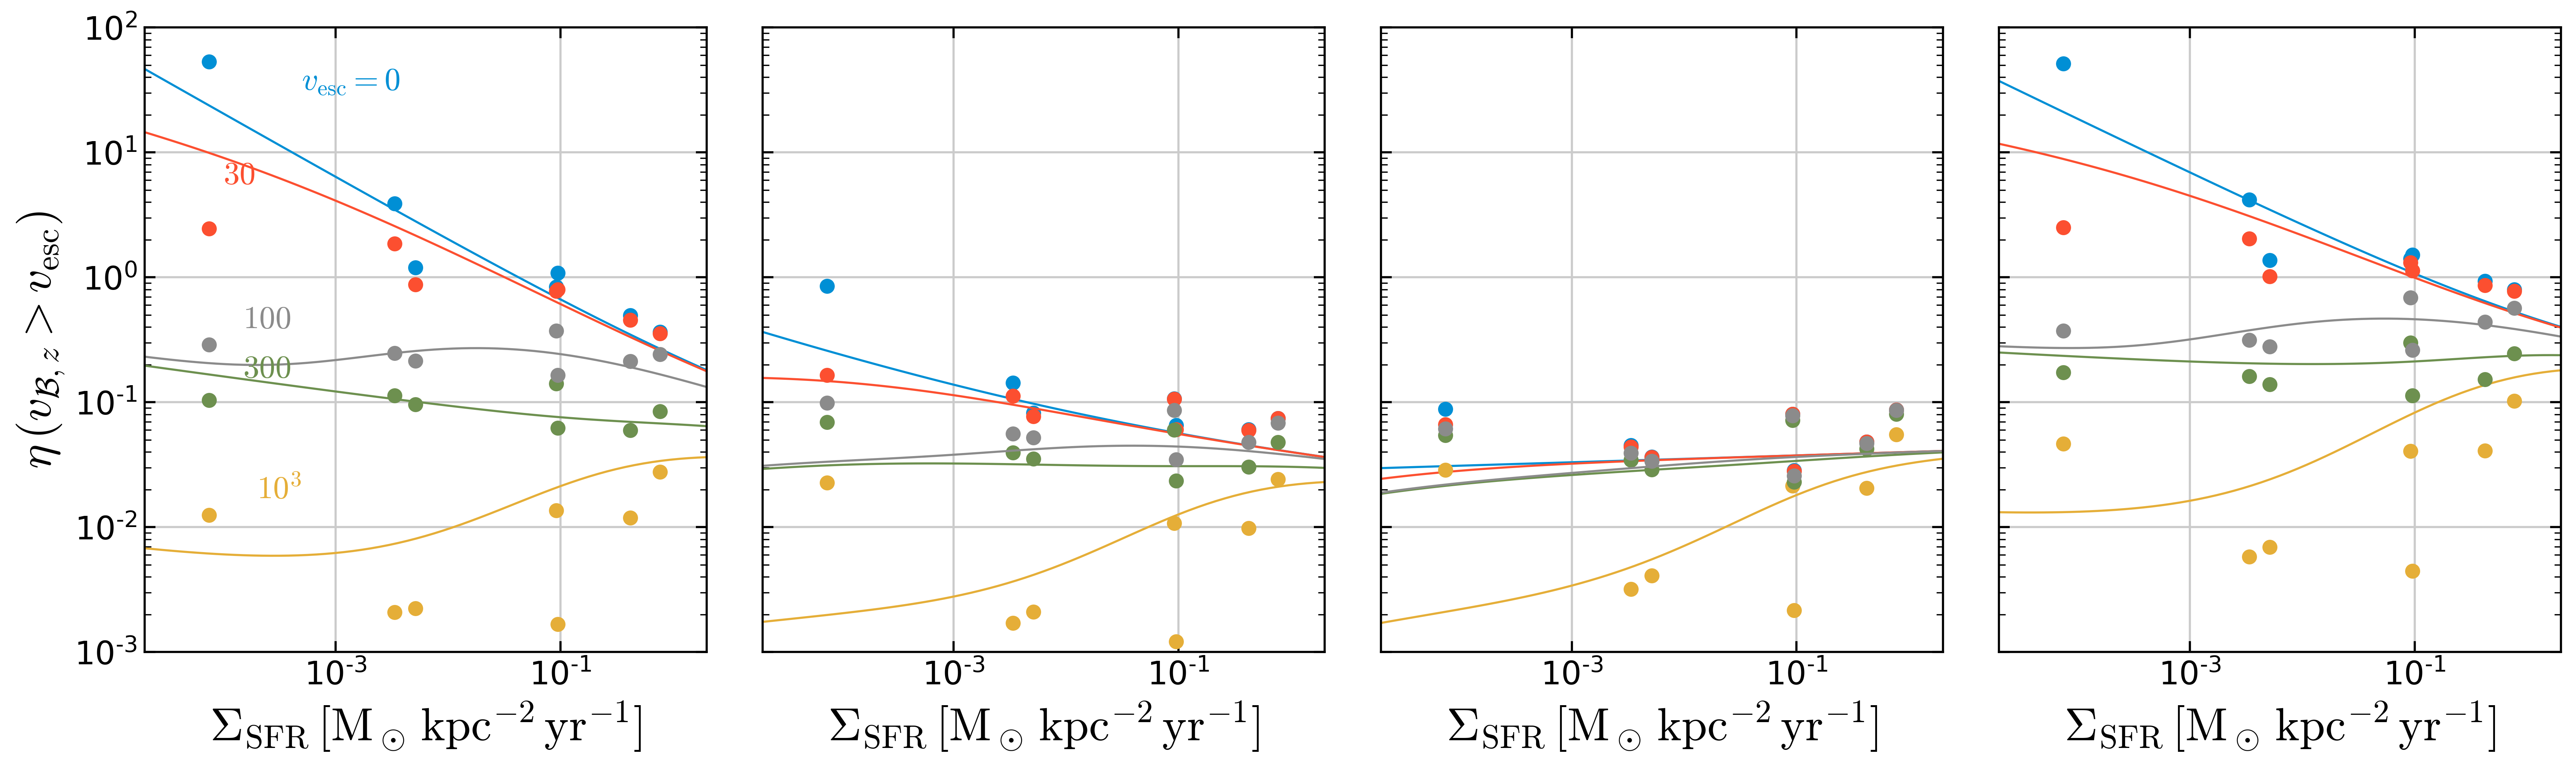

In [13]:
sims=twind.TigressSimContainer(z0='1000')
tw=twind.TigressWindModel(z0=sims.z0,verbose=False)
tw.set_axes(verbose=False)
modelpdf=tw.build_model(renormalize=True,energy_bias=True,verbose=False)
fig = show_loading(modelpdf,sims=sims.sims)
plt.setp(fig.axes,'ylim',(1.e-3,1.e2))

## Figure 5: sampling example

Can we use `Twind` in cosmological simulations? Yes! We are working hard on developing subgrid model based on `Twind` in [the SMAUG collaboration](https://www.simonsfoundation.org/flatiron/center-for-computational-astrophysics/galaxy-formation/smaug/). Here's a quick demonstration of wind particle sampling. (See Appendix B of Paper II or the [source code](https://github.com/changgoo/Twind/tree/master/twind/sampler.py#L166) for the procedure in detail.)

In [14]:
# read in time series
sim = twind.TigressSimLoader('R8','H')
sim.load(download=True,time_series=True)
sim.set_axes(sim.simpdf)

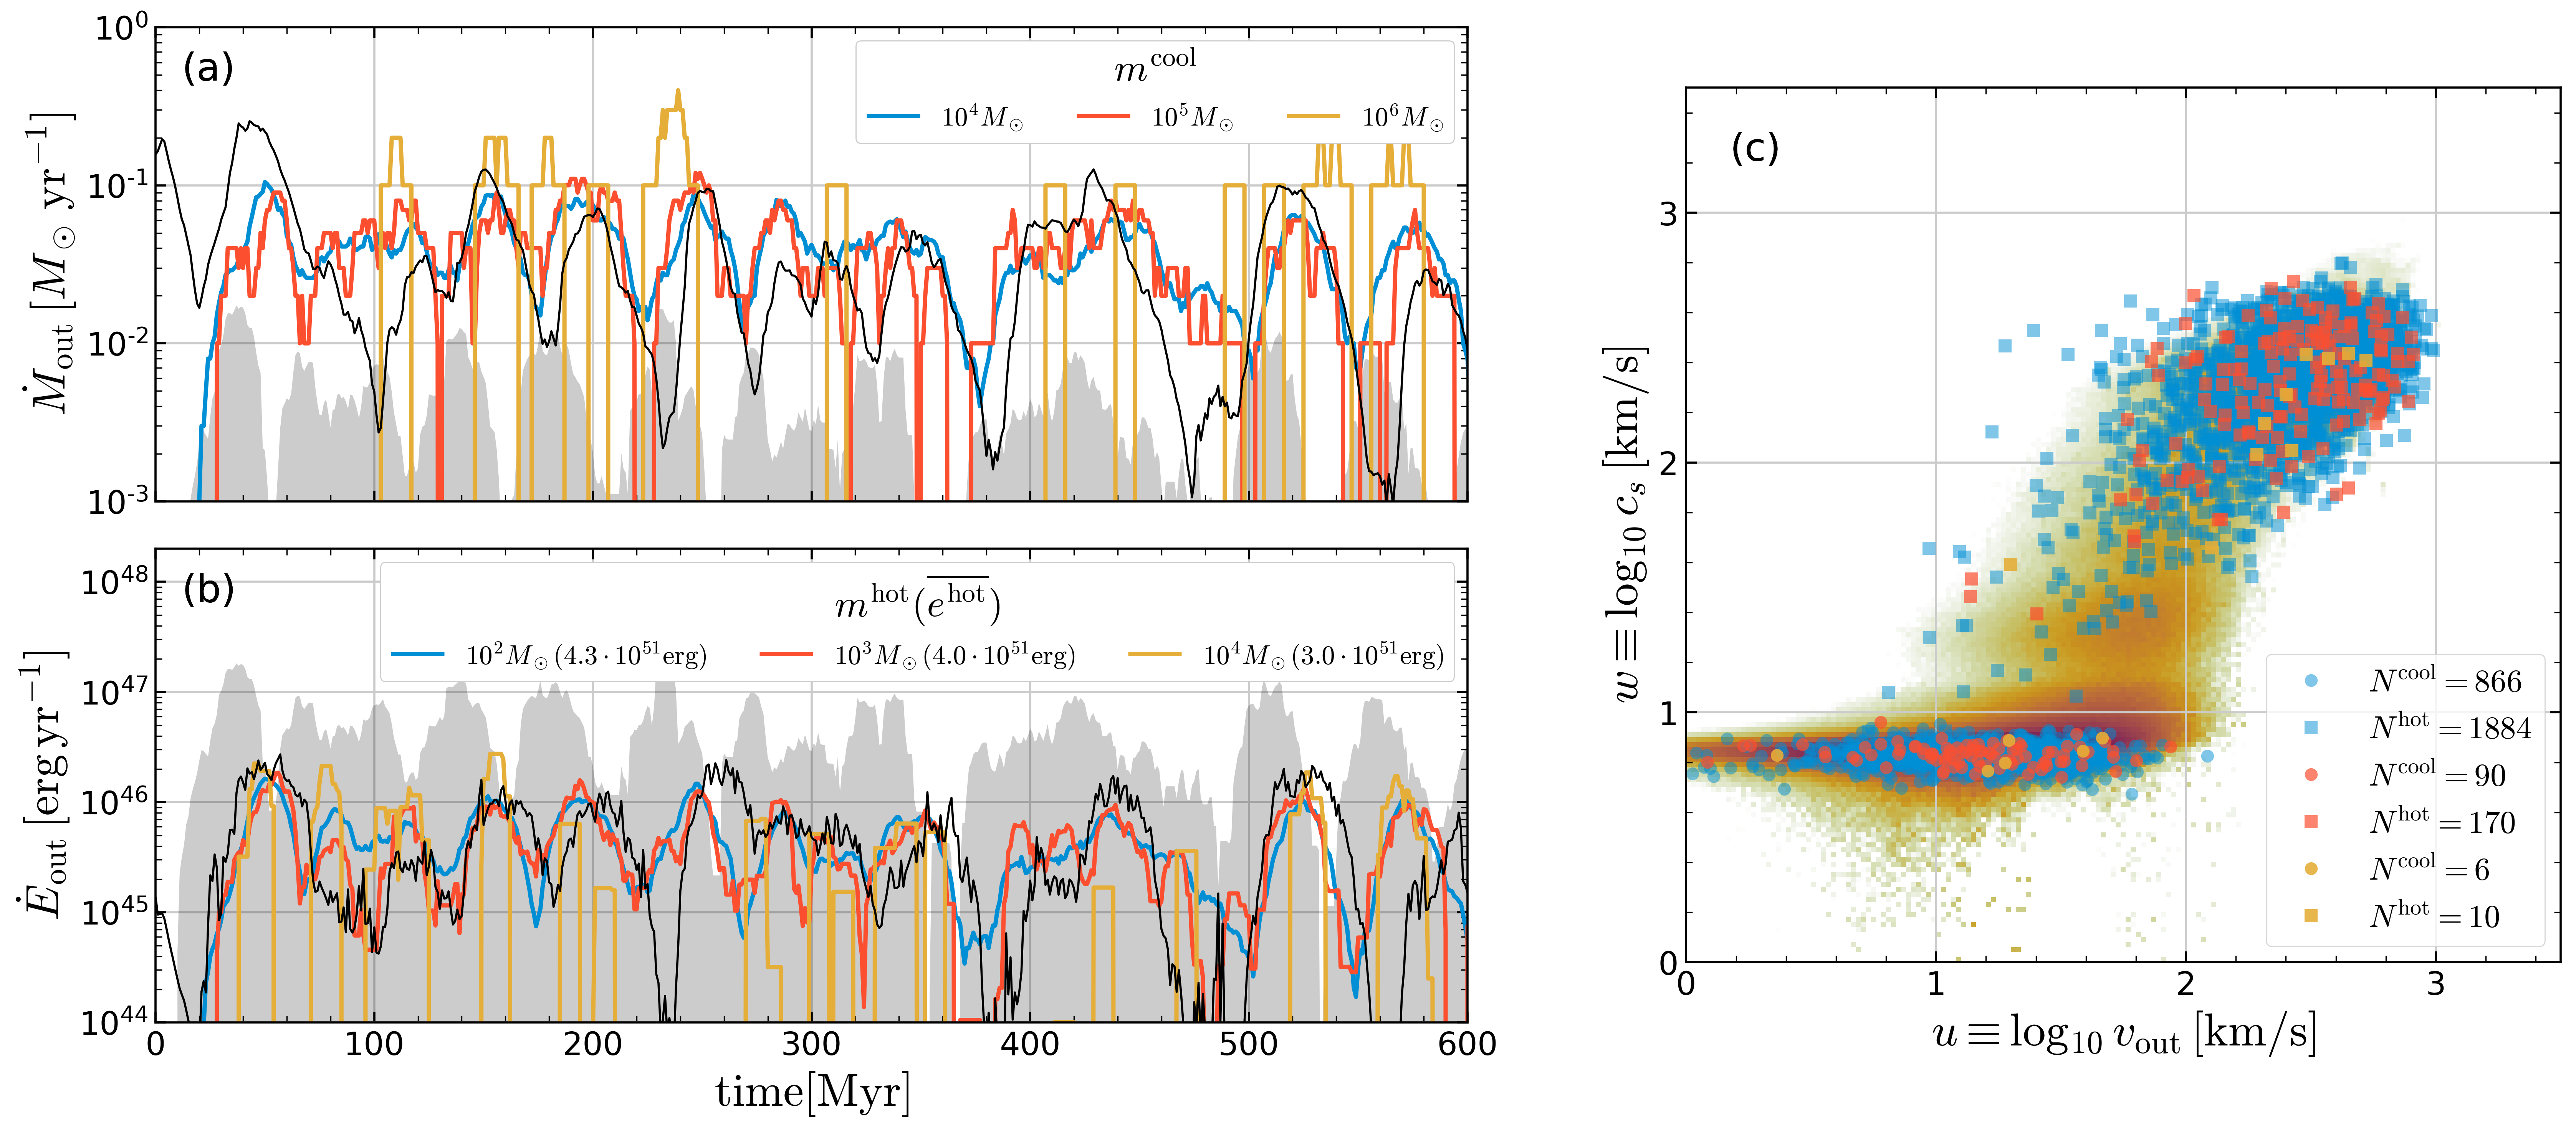

In [15]:
fig = sampling_from_simulation_sfr(sim)

Model sampling demonstration for **(a)** mass outflow rate of cool gas and **(b)** energy outflow rate of hot gas. The simulation result (black solid) is compared to the model for three different particle mass choices (colored lines; see keys).  The input to the model is $\Sigma_{\rm SFR}(t)$ from TIGRESS simulation R8, where 
    SFR$=\Sigma_{\rm SFR} L_x L_y$ is shown as the grey shaded region in (a) and the corresponding SN energy injection rate is shown as the grey region in (b).
    **(c)** Distributions of cool (circles) and hot (squares) outflow particles sampled over $t =220$ - $440$Myr from the different mass sampling cases (number of particles drawn is shown in the legend). The simulation PDF over the same time interval is shown in the background.